In [1]:
from skimage import data, color
from matplotlib import pyplot as plt
import numpy as np
from skimage import morphology
from skimage.filters import try_all_threshold
import os


def show_image(image, title='Title', cmap_type = 'gray'):
               plt.imshow(image, cmap = cmap_type)
               plt.title(title)
               plt.axis('off')
               plt.show()
            
def plot_comparison(original, filtered, title_filtered, size = (8,6)):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(size[0],size[1]), sharex = True, sharey = True)
    
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap =plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [2]:
idir = "images"
included_extensions = ['jpg','jpeg', 'bmp', 'png', 'gif']
files = [fn for fn in os.listdir(idir)
              if any(fn.endswith(ext) for ext in included_extensions)]

In [3]:
files

['3_cropped.jpg',
 'buildings.jpg',
 'buildings1.jpg',
 'buildings2.jpg',
 'face1.jpg',
 'face2.jpg',
 'face3.jpg',
 '1_cropped.jpg',
 '2_cropped.jpg']

In [6]:
#Reading the plants images
im1 = plt.imread('images/1_cropped.JPG')
im2 = plt.imread('images/2_cropped.JPG')
im3 = plt.imread('images/3_cropped.JPG')

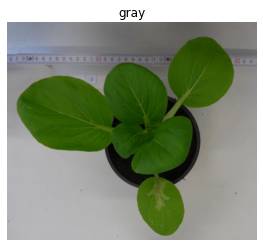

In [17]:
show_image(im1, 'gray', 'gray')

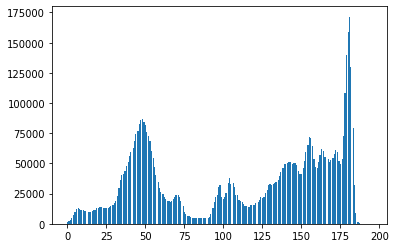

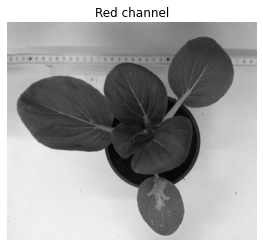

In [19]:
im1_red = im1[:,:,0]
plt.hist(im1_red.ravel(), bins = 256) #The ravel method will flatten the image to an array
plt.show()
show_image(im1_red, 'Red channel')

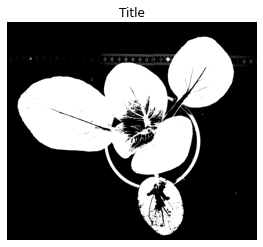

In [33]:
#Let's try to segment the leaves using the red channel
red_thresh = (im1_red < 75) & (im1_red > 25)
show_image(red_thresh)

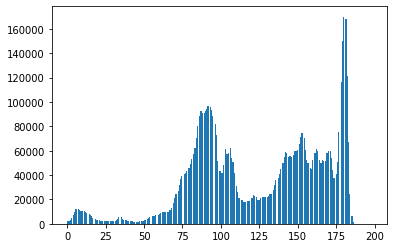

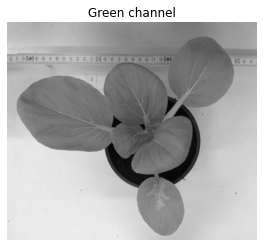

In [34]:
im1_green = im1[:,:,1]
plt.hist(im1_green.ravel(), bins = 256) #The ravel method will flatten the image to an array
plt.show()
show_image(im1_green, 'Green channel')

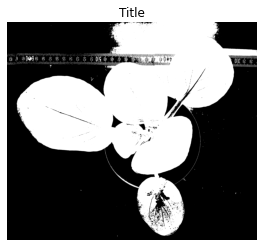

In [43]:
#Let's try to segment the leaves using the green channel
green_thresh = (im1_green > 50) & (im1_green < 110)
show_image(green_thresh)

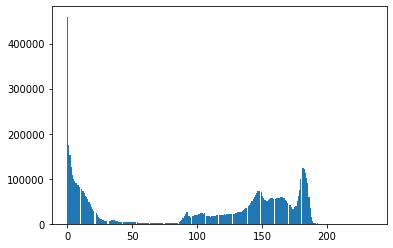

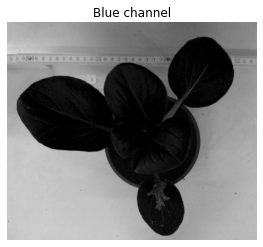

In [21]:
im1_blue = im1[:,:,2]
plt.hist(im1_blue.ravel(), bins = 256) #The ravel method will flatten the image to an array
plt.show()
show_image(im1_blue, 'Blue channel')

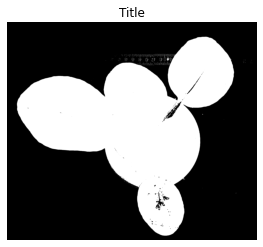

In [44]:
#Let's try to segment the leaves using the blue channel
blue_thresh = im1_blue < 50
show_image(blue_thresh)

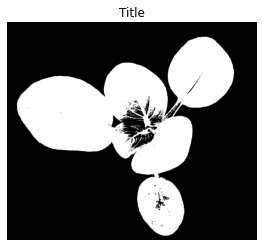

In [70]:
#Let add the three threshold together

general_threshold = (im1_blue < 50) & ((im1_green > 50) & (im1_green < 150)) & ((im1_red > 25) & (im1_red < 150))
show_image(general_threshold)

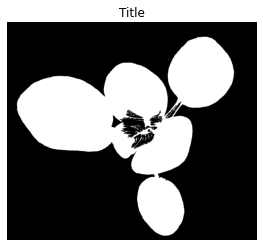

In [73]:
#Let do some morphological fixing
from skimage.morphology import area_closing

general_threshold_closing = area_closing(general_threshold, area_threshold=5000)
show_image(general_threshold_closing)

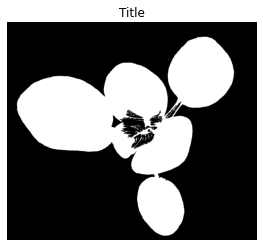

In [75]:
#Let do some morphological fixing
from skimage.morphology import area_opening

general_threshold_opening = area_closing(general_threshold_closing, area_threshold=1000)
show_image(general_threshold_opening)